In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
X,y = load_breast_cancer(return_X_y= True)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42)

In [7]:
X_train

array([[9.029e+00, 1.733e+01, 5.879e+01, ..., 1.750e-01, 4.228e-01,
        1.175e-01],
       [2.109e+01, 2.657e+01, 1.427e+02, ..., 2.903e-01, 4.098e-01,
        1.284e-01],
       [9.173e+00, 1.386e+01, 5.920e+01, ..., 5.087e-02, 3.282e-01,
        8.490e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 11)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [22]:
y_pred = knc.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[41,  2],
       [ 0, 71]], dtype=int64)

In [24]:
accuracy_score(y_test, y_pred)

0.9824561403508771

## Cross validation for K

In [15]:
from sklearn.model_selection import cross_val_score

accuracy_rate = []
for i in range(1,40):
    knc = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knc, X, y, cv = 3)
    accuracy_rate.append(score.mean())

In [16]:
accuracy_rate

[0.9050960735171261,
 0.9050682261208577,
 0.9209041121321823,
 0.9208855472013368,
 0.9226677805625174,
 0.9244221665274296,
 0.91914972616727,
 0.9261858349577649,
 0.9314768402487701,
 0.9297131718184349,
 0.931486122714193,
 0.9297224542838577,
 0.9279680683189455,
 0.9279680683189455,
 0.9244592963891209,
 0.9279680683189455,
 0.9174417525294718,
 0.9209505244592964,
 0.9174417525294718,
 0.9174417525294718,
 0.9156873665645596,
 0.9174417525294718,
 0.9156966490299824,
 0.9156966490299824,
 0.9139515455304928,
 0.9104242086698227,
 0.9104242086698227,
 0.9121878771001578,
 0.9121878771001578,
 0.9121878771001578,
 0.9121878771001578,
 0.9104334911352455,
 0.9121878771001578,
 0.9121878771001578,
 0.9157059314954052,
 0.9157059314954052,
 0.9139515455304928,
 0.9139422630650701,
 0.9156966490299824]

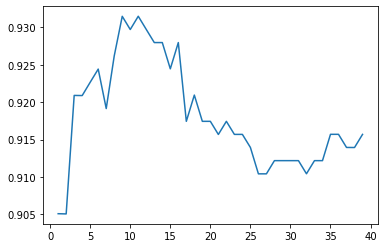

In [17]:
plt.plot(range(1,40), accuracy_rate)